In [1]:
import sys
sys.path.insert(0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import classification as cl
import CPOL_func as cf
import caine_func as caf
import analysis

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF

%pdb

base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/graphml.py:346: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.int, "int"), (np.int8, "int"),
/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/gexf.py:220: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to us

Automatic pdb calling has been turned ON


In [42]:
# with open(save_dir + '/lin.pkl', 'rb') as f:
#     tracks_obj = pickle.load(f)
with open(save_dir + '/lin.pkl', 'rb') as f:
    tracks_obj_lin = pickle.load(f)
with open(save_dir + '/thompson.pkl', 'rb') as f:
    tracks_obj_thomp = pickle.load(f)
with open(save_dir + 'base/20051001_20060501.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

In [43]:
tracks_obj.tracks = tracks_obj.tracks.loc[:,np.datetime64('2006-02-09T00:00'):np.datetime64('2006-02-13T12:00'),:,:]
tracks_obj_lin.tracks = tracks_obj_lin.tracks.loc[:,np.datetime64('2006-02-09T00:00'):np.datetime64('2006-02-13T12:00'),:,:]
tracks_obj_thomp.tracks = tracks_obj_thomp.tracks.loc[:,np.datetime64('2006-02-09T00:00'):np.datetime64('2006-02-13T12:00'),:,:]

In [10]:
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Liberation Serif'})
rcParams.update({'mathtext.fontset': 'dejavuserif'})
rcParams.update({'font.size': 12})

In [36]:
# cond_1 = tracks_obj.exclusions['duration_cond'].values
# tracks_obj.tracks = tracks_obj.tracks[cond_1]

# cond_2 = tracks_obj_lin.exclusions['duration_cond'].values
# tracks_obj_lin.tracks = tracks_obj_lin.tracks[cond_2]

# cond_3 = tracks_obj_thomp.exclusions['duration_cond'].values
# tracks_obj_thomp.tracks = tracks_obj_thomp.tracks[cond_3]

485 196 239
485 196 239
485 196 239
485 196 239


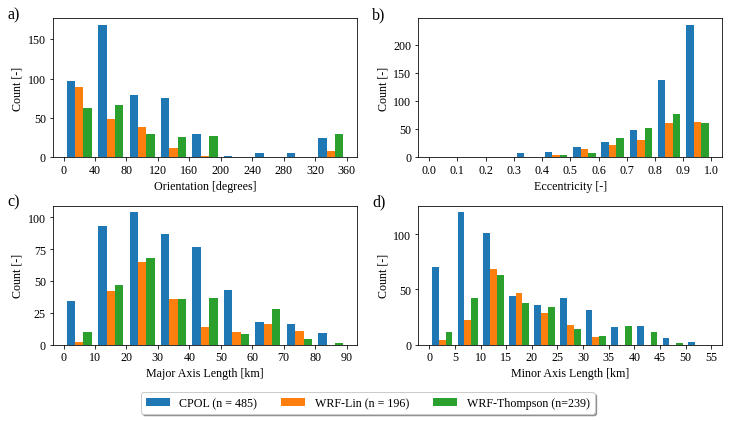

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(12,6))

var_list = [
    'orientation', 'eccentricity',
    'semi_major', 'semi_minor']

bins = [
    np.arange(0, 380, 40), np.arange(0, 1.1, .1),
    np.arange(0, 100, 10), np.arange(0, 60, 5)]

x_lab = [
    'Orientation [degrees]', 'Eccentricity [-]', 
    'Major Axis Length [km]', 'Minor Axis Length [km]']

proj_area_1 = tracks_obj.tracks.xs(0, level='level')['proj_area'].values
proj_area_2 = tracks_obj_lin.tracks.xs(0, level='level')['proj_area'].values
proj_area_3 = tracks_obj_thomp.tracks.xs(0, level='level')['proj_area'].values

for i in range(len(var_list)):

    lvl = 0
    x1 = tracks_obj.tracks.xs(0, level='level')[var_list[i]].values
#     x1 = x1[proj_area_1>500]
    x2 = tracks_obj_lin.tracks.xs(0, level='level')[var_list[i]].values
#     x2 = x2[proj_area_2>500]
    x3 = tracks_obj_thomp.tracks.xs(0, level='level')[var_list[i]].values
#     x3 = x3[proj_area_3>500]
    print(len(x1), len(x2), len(x3))

    axes.flatten()[i].hist(
        [x1, x2, x3], density=False, bins=bins[i],
        label=['CPOL (n = 485)', 'WRF-Lin (n = 196)', 'WRF-Thompson (n=239)'])
    axes.flatten()[i].set_xticks(bins[i])
    axes.flatten()[i].set_xlabel(x_lab[i])
    axes.flatten()[i].set_ylabel('Count [-]')
#     axes.flatten()[i].text(
#         0.5, 1.05, titles[i], ha='center',
#         transform=axes.flatten()[i].transAxes, size=12)
    
#     if i == 0:
#         axes.flatten()[i].ticklabel_format(
#             style='sci', scilimits=(0,0), axis='x')
#         axes.flatten()[i].set_xticks(bins[i])
    
axes.flatten()[-1].legend(
    bbox_to_anchor=(.6, -0.3), fancybox=True, ncol=3, shadow=True)

plt.subplots_adjust(hspace=0.35)
cl.make_subplot_labels(axes.flatten())

plt.savefig(
    'TWPICE_comp.png', dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')